In [456]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns; sns.set(style ='white', color_codes = True)
import codes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [361]:
fmld171 = pd.read_csv('diary17/fmld171.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld172 = pd.read_csv('diary17/fmld172.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld173 = pd.read_csv('diary17/fmld173.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld174 = pd.read_csv('diary17/fmld174.csv', dtype={'NEWID': str, 'HIGH_EDU': str})

In [362]:
cex = [fmld171, fmld172, fmld173, fmld174]

In [363]:
results = pd.concat(cex, ignore_index = True)

In [109]:
list(results.columns)

['INC_RNKM',
 'INC_RNK5',
 'INC_RNK4',
 'INC_RNK3',
 'INC_RNK2',
 'INC_RNK1',
 'INC_RANK',
 'NEWID',
 'AGE_REF',
 'AGE_REF_',
 'AGE2',
 'AGE2_',
 'BLS_URBN',
 'CUTENURE',
 'CUTE_URE',
 'DESCRIP',
 'DESCRIP_',
 'EARNCOMP',
 'EARN_OMP',
 'EDUC_REF',
 'EDUC0REF',
 'EDUCA2',
 'EDUCA2_',
 'EMPLTYP1',
 'EMPL_YP1',
 'EMPLTYP2',
 'EMPL_YP2',
 'FAM_SIZE',
 'FAM__IZE',
 'FAM_TYPE',
 'FAM__YPE',
 'FGVX',
 'FGVX_',
 'FINCBEFX',
 'FINC_EFX',
 'FINLWT21',
 'FIRAX',
 'FIRAX_',
 'FJSSDEDX',
 'FJSS_EDX',
 'FPVTX',
 'FPVTX_',
 'FREEMLX',
 'FREEMLX_',
 'FRRX',
 'FRRX_',
 'FS_MTHI',
 'FS_MTHI_',
 'FSS_RRX',
 'FSS_RRX_',
 'FSUPPX',
 'FSUPPX_',
 'FWAGEX',
 'FWAGEX_',
 'HRSPRWK1',
 'HRSP_WK1',
 'HRSPRWK2',
 'HRSP_WK2',
 'JFS_AMT',
 'JFS_AMT_',
 'JGRCFDMV',
 'JGRC_DMV',
 'JGRCFDWK',
 'JGRC_DWK',
 'JGROCYMV',
 'JGRO_YMV',
 'JGROCYWK',
 'JGRO_YWK',
 'LUMPX',
 'LUMPX_',
 'MARITAL1',
 'MARI_AL1',
 'NO_EARNR',
 'NO_E_RNR',
 'OCCEXPNX',
 'OCCE_PNX',
 'OCCULIS2',
 'OCCU_IS2',
 'OTHINX',
 'OTHINX_',
 'OTHRECX',
 'OTH

In [364]:
meat_column = ['BEEF',
 'PORK',
 'OTHMEAT',
 'POULTRY',
 'SEAFOOD']

In [365]:
results['meat_spent'] = sum(results[column] for column in meat_column)

In [366]:
# results['meat_spent']

In [367]:
results['meat_per_person'] = results['meat_spent']/results['FAM_SIZE']

In [234]:
# results['FAM_SIZE'].value_counts()

In [69]:
# results['meat_per_person']

In [116]:
results['HIGH_EDU'].value_counts()

15    3038
13    2321
16    2199
12    2126
14    1277
11     536
10     148
00      13
Name: HIGH_EDU, dtype: int64

In [87]:
alc_test = results[(results['ALCBEV'] > 0)& (results['meat_per_person'] > 0)]

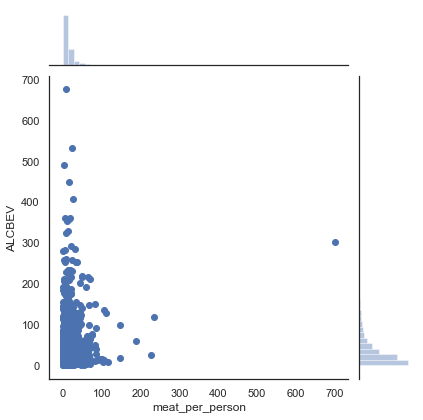

In [88]:
sns.jointplot(x= 'meat_per_person', y = 'ALCBEV', data = alc_test)

In [79]:
smoke_test = results[(results['SMOKSUPP'] > 0)& (results['meat_per_person'] > 0)]

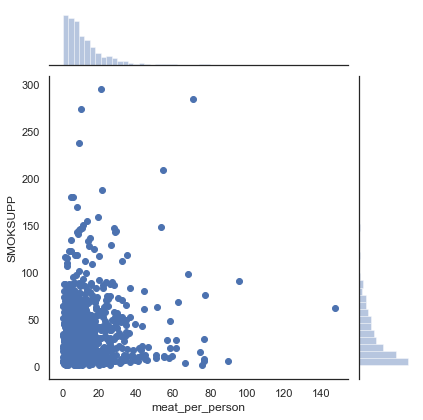

In [83]:
sns.jointplot(x= 'meat_per_person', y = 'SMOKSUPP', data = smoke_test)

In [368]:
veggie_column = ['FRSHFRUT',
 'FRSHVEG',
 'PROCFRUT',
 'PROCVEG']

In [369]:
results['veggie_spent'] = sum(results[column] for column in veggie_column)

In [370]:
results['veggie_per_person'] = results['veggie_spent']/results['FAM_SIZE']

In [371]:
veggie_test = results[(results['veggie_per_person'] > 0)& (results['meat_per_person'] > 0)]

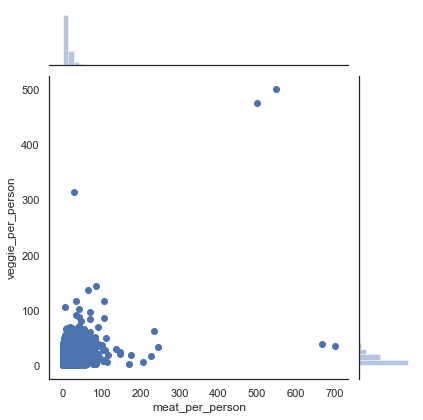

In [90]:
sns.jointplot(x= 'meat_per_person', y = 'veggie_per_person', data = veggie_test)

In [372]:
edu_df = pd.get_dummies(results['HIGH_EDU'], prefix = 'EDU')

In [373]:
edu_df.rename(mapper = codes.education, inplace= True, axis = 1)

In [374]:
results = results.merge(edu_df, left_index=True, right_index=True)

In [375]:
edu_df.columns

Index(['No_schooling', 'Elementary_school', 'Some_high_school',
       'High_school_graduate', 'Some_college', 'Associate_degree',
       'Bachelor_degree', 'Graduate_degree'],
      dtype='object')

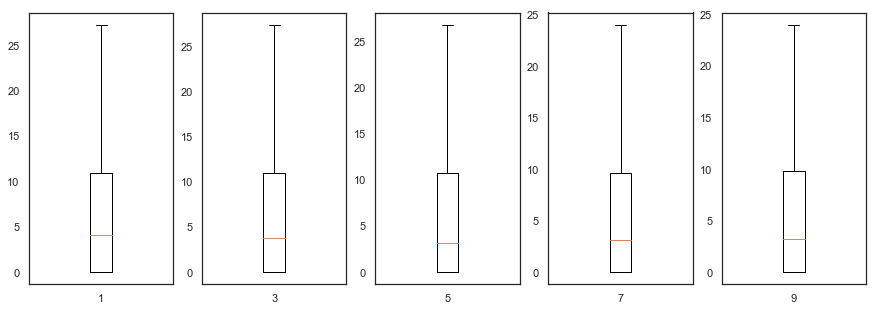

In [239]:
fig, ax = plt.subplots(1,5, figsize = (15,5))
fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
ax[0].boxplot(results[results['Graduate_degree'] == 1]['meat_per_person'], positions = [1], sym=  '')
ax[1].boxplot(results[results['Bachelor_degree'] == 1]['meat_per_person'], positions = [3], sym= '')
ax[2].boxplot(results[results['High_school_graduate'] == 1]['meat_per_person'], positions = [5], sym= '')
ax[3].boxplot(results[results['Some_college'] == 1]['meat_per_person'], positions = [7], sym= '')
ax[4].boxplot(results[results['Some_high_school'] == 1]['meat_per_person'], positions = [9], sym='')
plt.show()

In [240]:

print(results[results['Graduate_degree'] == 1]['meat_per_person'].mean())
print(results[results['Bachelor_degree'] == 1]['meat_per_person'].mean())
print(results[results['Some_college'] == 1]['meat_per_person'].mean())
print(results[results['High_school_graduate'] == 1]['meat_per_person'].mean())
print(results[results['Some_high_school'] == 1]['meat_per_person'].mean())

8.040829495004605
8.141240073583903
7.029656879109302
7.59483960444402
11.399704631751945


In [241]:
print(results[results['Graduate_degree'] == 1]['FAM_SIZE'].mean())
print(results[results['Bachelor_degree'] == 1]['FAM_SIZE'].mean())
print(results[results['Some_college'] == 1]['FAM_SIZE'].mean())
print(results[results['High_school_graduate'] == 1]['FAM_SIZE'].mean())
print(results[results['Some_high_school'] == 1]['FAM_SIZE'].mean())

2.618917689859027
2.531928900592495
2.408875484704869
2.266698024459078
2.3227611940298507


In [242]:
print(results[results['Graduate_degree'] == 1]['FINCBEF5'].mean())
print(results[results['Bachelor_degree'] == 1]['FINCBEF5'].mean())
print(results[results['Some_college'] == 1]['FINCBEF5'].mean())
print(results[results['High_school_graduate'] == 1]['FINCBEF5'].mean())
print(results[results['Some_high_school'] == 1]['FINCBEF5'].mean())

139404.6539336062
97063.21757735353
55689.69237397674
43127.01222953904
28669.152985074626


In [376]:
urban_income = results[(results['BLS_URBN'] == 1) & (results['FINCBEF5'] > 0)]['meat_per_person']/\
                results[(results['BLS_URBN'] == 1) & (results['FINCBEF5'] > 0)]['FINCBEF5']

In [377]:
urban_income.mean()

0.003708400629546656

In [378]:
rural_income = results[(results['BLS_URBN'] == 2) & (results['FINCBEF5'] > 0)]['meat_per_person']/\
                results[(results['BLS_URBN'] == 2) & (results['FINCBEF5'] > 0)]['FINCBEF5']

In [379]:
rural_income.mean()

0.0004511685122968241

In [380]:
results['SEX_REF'] = np.where(results['SEX_REF'] == 1,'Male', 'Female')

In [381]:
results['SEX_REF']

0          Male
1          Male
2        Female
3        Female
4          Male
5          Male
6        Female
7        Female
8          Male
9          Male
10       Female
11       Female
12         Male
13         Male
14         Male
15       Female
16       Female
17       Female
18       Female
19         Male
20         Male
21         Male
22         Male
23       Female
24       Female
25         Male
26         Male
27       Female
28       Female
29         Male
          ...  
11628    Female
11629    Female
11630    Female
11631    Female
11632      Male
11633      Male
11634    Female
11635    Female
11636    Female
11637    Female
11638      Male
11639      Male
11640      Male
11641      Male
11642    Female
11643    Female
11644      Male
11645      Male
11646      Male
11647      Male
11648      Male
11649      Male
11650    Female
11651    Female
11652    Female
11653    Female
11654    Female
11655    Female
11656      Male
11657      Male
Name: SEX_REF, Length: 1

In [382]:
sex_df = pd.get_dummies(results['SEX_REF'])

In [383]:
sex_df

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [384]:
results = results.merge(sex_df, left_index=True, right_index=True)

In [255]:
results

,INC_RNKM,INC_RNK5,INC_RNK4,INC_RNK3,INC_RNK2,INC_RNK1,INC_RANK,NEWID,AGE_REF,AGE_REF_,...,No_schooling,Elementary_school,Some_high_school,High_school_graduate,Some_college,Associate_degree,Bachelor_degree,Graduate_degree,Female,Male
0,0.704286,0.706457,0.699513,0.705671,0.709034,0.707517,0.763599,03608891,27,D,...,0,0,0,0,0,1,0,0,0,1
1,0.704573,0.706744,0.699800,0.705958,0.709321,0.707804,0.763886,03608892,27,D,...,0,0,0,0,0,1,0,0,0,1
2,0.256737,0.272063,0.260261,0.263508,0.273057,0.266441,0.375717,03608901,53,D,...,0,0,0,1,0,0,0,0,1,0
3,0.256312,0.271638,0.259836,0.263083,0.272632,0.266016,0.375292,03608902,53,D,...,0,0,0,1,0,0,0,0,1,0
4,0.346813,0.360343,0.345145,0.350655,0.364780,0.354823,0.458908,03608921,56,D,...,0,0,0,0,0,0,1,0,0,1
5,0.347984,0.361515,0.346317,0.351826,0.365952,0.355994,0.460079,03608922,56,D,...,0,0,0,0,0,0,1,0,0,1
6,0.734851,0.733405,0.727955,0.732500,0.734379,0.737004,0.788118,03608931,34,D,...,0,0,0,0,0,0,1,0,1,0
7,0.734663,0.733217,0.727767,0.732312,0.734191,0.736816,0.787930,03608932,34,D,...,0,0,0,0,0,0,1,0,1,0
8,0.358430,0.252492,0.330986,0.613276,0.322888,0.234753,0.005449,03608951,64,D,...,0,0,0,1,0,0,0,0,0,1
9,0.314041,0.100143,0.237747,0.417011,0.575435,0.150802,0.007812,03608952,64,D,...,0,0,0,1,0,0,0,0,0,1


In [385]:
men_meat = results[(results['SEX_REF'] == 'Male') &(results['meat_per_person'] > 0) & (results['meat_per_person'] < 100)]['meat_per_person']

In [386]:
women_meat =results[(results['SEX_REF'] == 'Female') & (results['meat_per_person'] > 0) & (results['meat_per_person'] < 100)]['meat_per_person']

In [387]:
men_veggie = results[(results['SEX_REF'] == 'Male') & (results['veggie_per_person'] > 0)  & (results['veggie_per_person'] < 70)]['veggie_per_person']

In [388]:
women_veggie = results[(results['SEX_REF'] == 'Female') & (results['veggie_per_person'] > 0) & (results['veggie_per_person'] < 70)]['veggie_per_person']

596.0
463.0


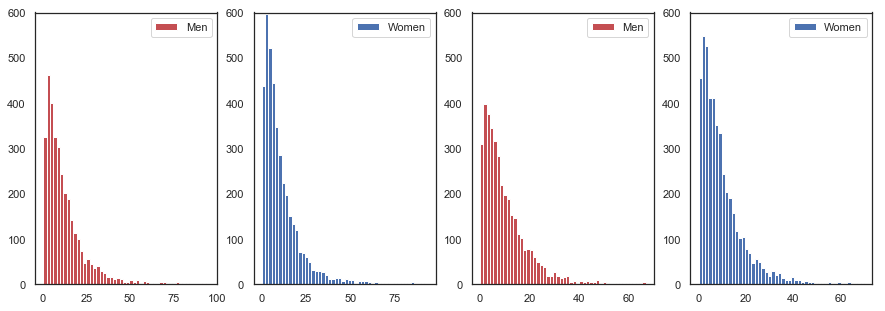

In [421]:
fig, ax = plt.subplots(1,4, figsize = (15,5))
# fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
men = 'Men'
women = 'Women'
men_meat_n, men_meat_bins, men_meat_patches = ax[0].hist(men_meat, color= 'r', bins = 50, label = men)
women_meat_n, women_meat_bins, women_meat_patches = ax[1].hist(women_meat, bins = 50, label = women)
men_veggie_n, men_veggie_bins, men_veggie_patches = ax[2].hist(men_veggie, color = 'r', bins = 50, label = men)
women_veggie_n, women_veggie_bins, women_veggie_patches = ax[3].hist(women_veggie, bins = 50, label = women)
[axis.set_ylim([0, 600]) for axis in ax]
print(women_meat_n[np.argmax(women_meat_n)])
print(men_meat_n[np.argmax(men_meat_n)])
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

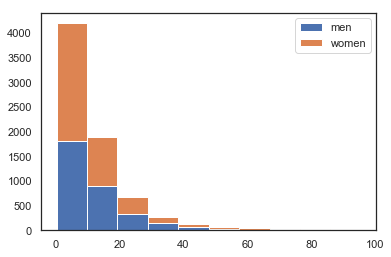

In [422]:
fig, axes = plt.subplots()

labels = ['men', 'women']
x = [men_meat, women_meat]
axes.hist(x, bins = 10, histtype='bar', stacked=True, label = labels)
plt.legend(labels)
plt.show()

In [341]:
results[(results.meat_per_person > 2.19) & (results.meat_per_person < 2.40)]['meat_per_person'].count()

92

In [391]:
results['OCCULIS1'] = results['OCCULIS1'].fillna(18.0).astype('int64')

In [392]:
results['OCCULIS1'] = results['OCCULIS1'].apply(lambda x: codes.occupation['OCCULIS1'][x] if x is not None else 19)
#len(codes.occupation['OCCULIS1'])

In [393]:
results['OCCULIS1'].value_counts()

Unknown                                       3943
Administrative support, including clerical    1741
Machine operator, assembler, inspector        1214
Teacher                                        917
Transportation operator                        600
Sales, retail                                  556
Sales, business goods and services             537
Protective service                             484
Professional                                   471
Handler, helper, laborer                       445
Technician                                     322
Other service                                  155
Private household service                      102
Mechanic, repairer, precision production        95
Farming                                         40
Construction, mining                            36
Name: OCCULIS1, dtype: int64

In [424]:
occ_df = pd.get_dummies(results['OCCULIS1'], prefix = 'OCC')

In [426]:
results = results.merge(occ_df, right_index = True, left_index= True)

IndexError: index 6 is out of bounds for axis 0 with size 6

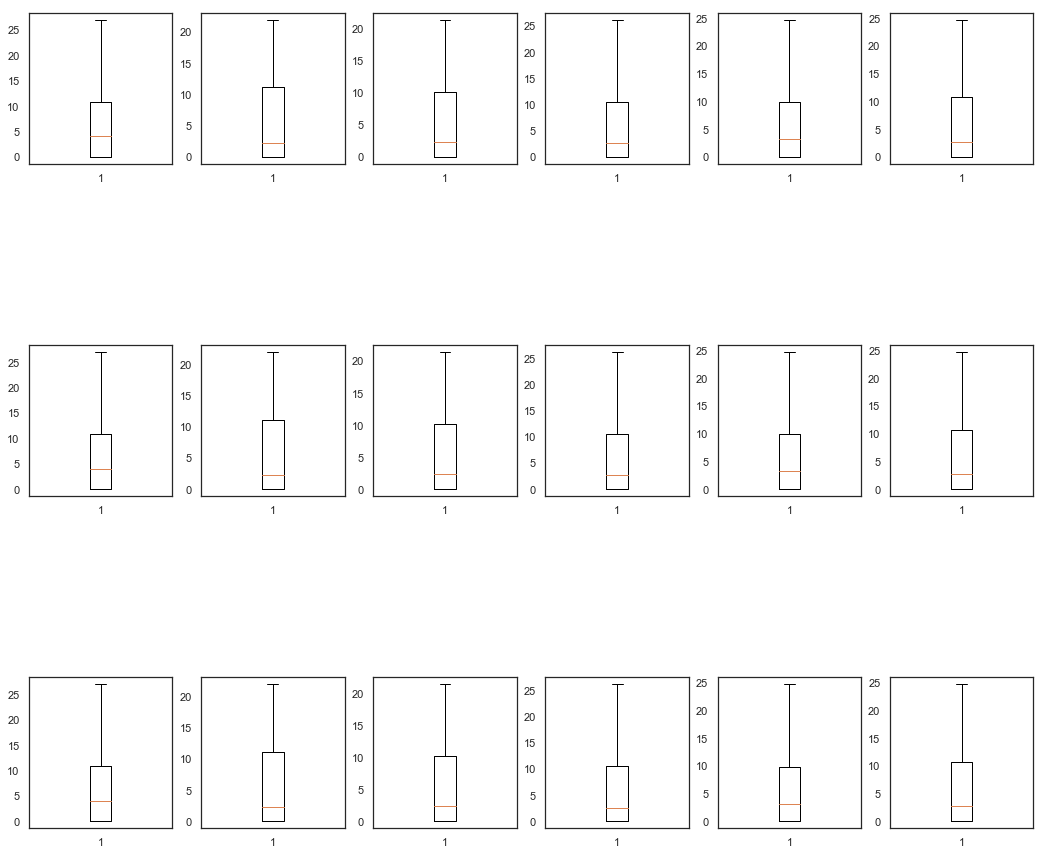

In [437]:
fig, ax = plt.subplots(3,6, figsize = (18,15))
fig.subplots_adjust(hspace = 1.2,left=None, bottom=None, right=None, top=None,wspace=None)
[axis[idx].boxplot(results[results[occupation] == 1]['meat_per_person'], sym='') \
    for idx, occupation in enumerate(occ_df.columns) for axis in ax]
plt.show()

In [443]:
[(occupation, results[results[occupation] == 1]['meat_per_person'].mean()) for occupation in occ_df.columns]

[('OCC_Administrative support, including clerical', 7.979751003587616),
 ('OCC_Construction, mining', 6.143133425925928),
 ('OCC_Farming', 8.640548749999999),
 ('OCC_Handler, helper, laborer', 7.024903457856253),
 ('OCC_Machine operator, assembler, inspector', 7.215618456532257),
 ('OCC_Mechanic, repairer, precision production', 8.991378605263158),
 ('OCC_Other service', 6.949884953791372),
 ('OCC_Private household service', 8.190647151960782),
 ('OCC_Professional', 6.855078904518213),
 ('OCC_Protective service', 7.7282854574150575),
 ('OCC_Sales, business goods and services', 7.295196296887471),
 ('OCC_Sales, retail', 8.635795271582735),
 ('OCC_Teacher', 7.676012605481124),
 ('OCC_Technician', 7.311992699719028),
 ('OCC_Transportation operator', 8.08079804435846),
 ('OCC_Unknown', 8.33556595571197)]

In [459]:
results = results[results['FINCBEF5'] >= 0]

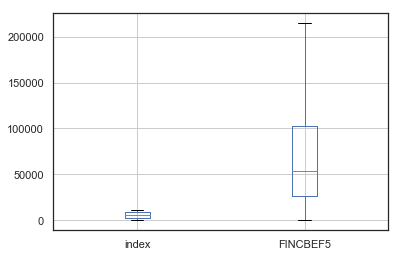

In [460]:
results['FINCBEF5'].reset_index().boxplot(sym='')

In [467]:
scipy.stats.pearsonr(results['FINCBEF5'], results['meat_per_person'])

(0.029531888563265836, 0.0014311542608196508)

In [465]:
scipy.stats.pearsonr(results['AGE_REF'], results['meat_per_person'])

(0.06879358352373038, 1.0519145525116934e-13)

In [463]:
scipy.stats.pearsonr(results['veggie_per_person'], results['meat_per_person'])

(0.5098690938525886, 0.0)

In [468]:
scipy.stats.pearsonr(results['ALCBEV'], results['meat_per_person'])

(0.11346998994524343, 1.0590048632132695e-34)

In [470]:
scipy.stats.pearsonr(results['SMOKSUPP'], results['meat_per_person'])

(0.03287116806616181, 0.00038671161588218166)

0.8246211251235321